In [ ]:
import pandas as pd
import time
import hashlib
exchange = "NASDAQ"
ticker = "SPY"
dateexpiry = "2025-06-20"
strike = 330
typeopt = "p"
# Initialize an empty DataFrame to hold all appended data
data = pd.DataFrame()

# Store the last clipboard hash to detect changes
last_clipboard_hash = None

def process_clipboard():
    global data, last_clipboard_hash

    # Read clipboard content as raw text
    clipboard_text = pd.io.clipboard.clipboard_get()

    # Hash clipboard content to detect changes
    current_hash = hashlib.md5(clipboard_text.encode('utf-8')).hexdigest()

    if current_hash == last_clipboard_hash:
        # No change in clipboard, skip processing
        return

    # Update last clipboard hash
    last_clipboard_hash = current_hash

    # Load clipboard data into DataFrame
    df = pd.read_clipboard()

    # Split the single column into multiple columns by comma
    df_split = df.iloc[:, 0].str.split(',', expand=True)

    # Remove quotes safely from all cells
    df_split = df_split.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

    # Select only Date, Open, High, Low, Close, and Volume columns by their positions
    selected_cols = [0, 1, 2, 3, 4, 7]
    df_selected = df_split.iloc[:, selected_cols]

    # Rename columns accordingly
    df_selected.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

    # Convert 'Date' to datetime
    df_selected['Date'] = pd.to_datetime(df_selected['Date'])

    # Convert price and volume columns to numeric, coercing errors to NaN
    for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
        df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')

    # Set 'Date' as index
    df_selected = df_selected.set_index('Date')

    # Append only new rows with datetime index not already in data
    if not data.empty:
        new_data = df_selected.loc[~df_selected.index.isin(data.index)]
        if not new_data.empty:
            data = pd.concat([data, new_data]).sort_index()
    else:
        data = df_selected

    print(f"Appended {len(df_selected)} rows, total rows: {len(data)}")
    print("\nLatest 10 records:")
    print(data.tail(10))
    print("\n---")

# Run every minute
while True:
    try:
        process_clipboard()
    except Exception as e:
        print(f"Error processing clipboard: {e}")
    time.sleep(20)  # wait 20 seconds before checking again


Error processing clipboard: Expected 4 fields in line 22, saw 10. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.


/var/folders/f_/1bh6mfq97bxdwzwnr49jf8nm0000gn/T/ipykernel_88305/3938024728.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_split = df_split.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)
/var/folders/f_/1bh6mfq97bxdwzwnr49jf8nm0000gn/T/ipykernel_88305/3938024728.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Date'] = pd.to_datetime(df_selected['Date'])
/var/folders/f_/1bh6mfq97bxdwzwnr49jf8nm0000gn/T/ipykernel_88305/3938024728.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

Appended 1994 rows, total rows: 1994

Latest 10 records:
                           Open  High   Low  Close  Volume
Date                                                      
2025-06-17 15:29:00+00:00  3.63  3.63  3.59   3.63     206
2025-06-17 15:30:00+00:00  3.60  3.68  3.60   3.62     114
2025-06-17 15:31:00+00:00  3.60  3.61  3.54   3.58      48
2025-06-17 15:32:00+00:00  3.56  3.60  3.56   3.57      25
2025-06-17 15:33:00+00:00  3.56  3.58  3.55   3.58      10
2025-06-17 15:34:00+00:00  3.59  3.65  3.58   3.62     135
2025-06-17 15:35:00+00:00  3.60  3.60  3.54   3.59     120
2025-06-17 15:36:00+00:00  3.63  3.78  3.61   3.74     383
2025-06-17 15:37:00+00:00  3.75  3.76  3.71   3.74     214
2025-06-17 15:38:00+00:00  3.70  3.70  3.66   3.66      17

---


KeyboardInterrupt: 

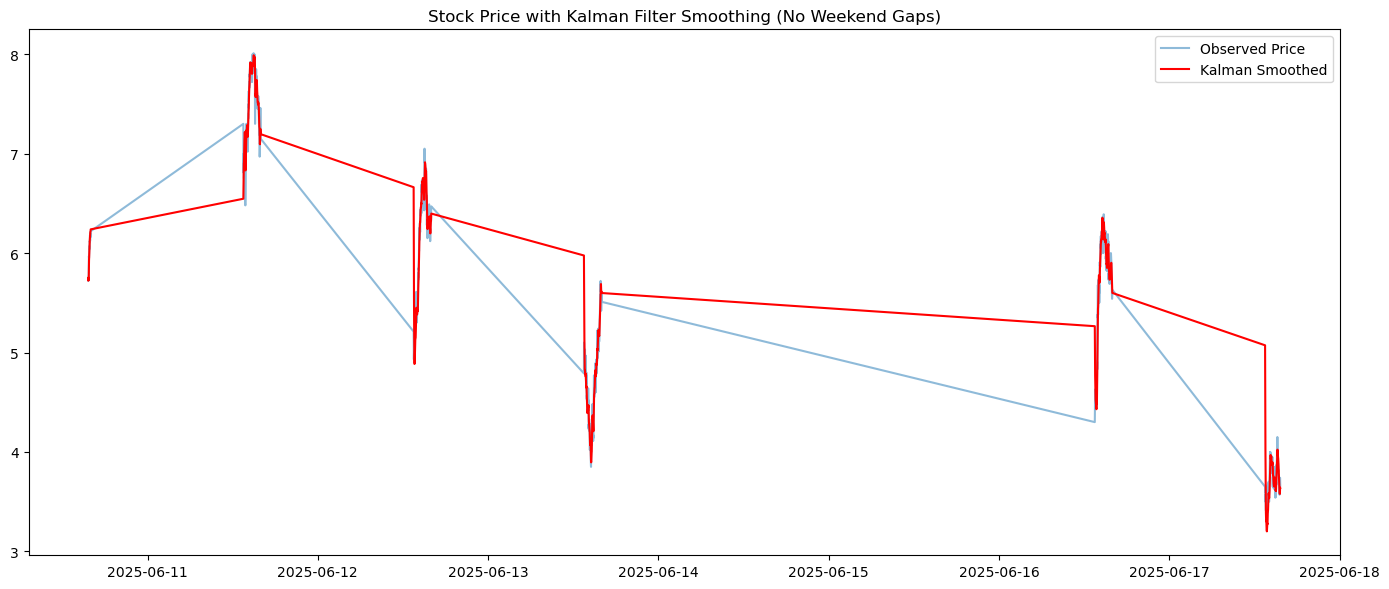

In [ ]:
## load each module individually, then maybe try to auto refresh. 

SyntaxError: invalid syntax (4066012398.py, line 1)